In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Load the dataset
df = pd.read_csv('transformed_energy_data1.csv')

# Convert Date components to datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64']).copy()

# Display first few rows
print(df_numeric.head())


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
   Year  Month  Day  TradingPeriod  Med$PerMWHr  Avg$PerMWHr  PrevAvg$PerMWHr  \
0  2023      1    2              1     6.084855     6.084855         6.084855   
1  2023      1    2              2     4.996544     4.996544         4.996544   
2  2023      1    2              3     4.580498     4.580498         4.580498   
3  2023      1    2              4     4.129496     4.129496         4.129496   
4  2023      1    2              5     4.587101     4.587101         4.587101   

   PrevMed$PerMWHr  SinPeriod  CosPeriod  SinDate   CosDate  
0         6.085682   0.258819   0.965926      0.5  0.866025  
1         4.996495   0.500000   0.866025      0.5  0.866025  
2         4.580858   0.707107   0.707107      0.5  0.866025  
3         4.130747   0.866025   0.500000      0.5  0.866025  
4         4.586993   0.965926   0.258819      0.5  0.866025  

In [7]:
# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model
df_numeric['Anomaly_Score'] = iso_forest.fit_predict(df_numeric)

# Mark anomalies (Anomaly_Score = -1 means an anomaly)
df_numeric['Anomaly'] = df_numeric['Anomaly_Score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Display anomaly counts
print(df_numeric['Anomaly'].value_counts())

# Merge back with original dataset
df['Anomaly'] = df_numeric['Anomaly']


Anomaly
Normal     31281
Anomaly     1647
Name: count, dtype: int64


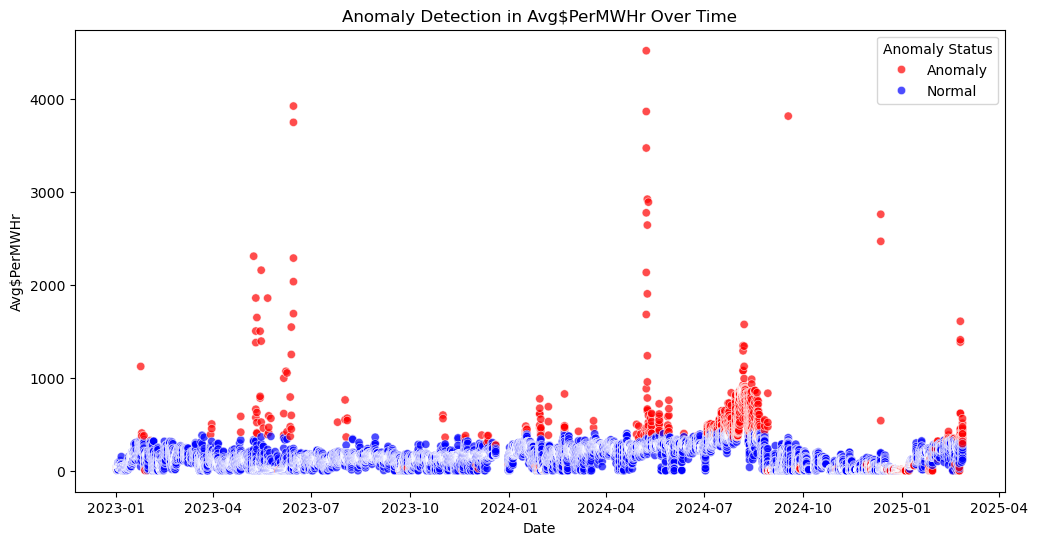

In [8]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Date', y='Avg$PerMWHr', hue='Anomaly', palette={'Normal': 'blue', 'Anomaly': 'red'}, alpha=0.7)
plt.title('Anomaly Detection in Avg$PerMWHr Over Time')
plt.xlabel('Date')
plt.ylabel('Avg$PerMWHr')
plt.legend(title='Anomaly Status')
plt.show()


C:\Users\shara\AppData\Local\Temp\ipykernel_16484\3400345281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Anomaly', y='Avg$PerMWHr', palette={'Normal': 'lightblue', 'Anomaly': 'red'})


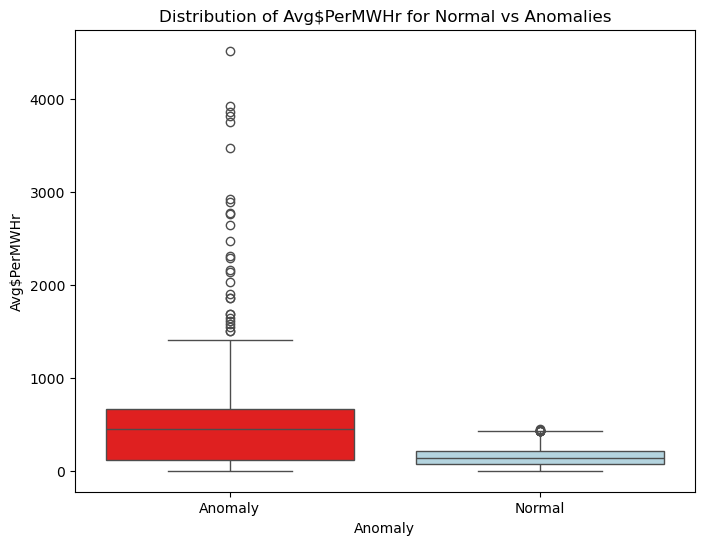

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Anomaly', y='Avg$PerMWHr', palette={'Normal': 'lightblue', 'Anomaly': 'red'})
plt.title('Distribution of Avg$PerMWHr for Normal vs Anomalies')
plt.show()


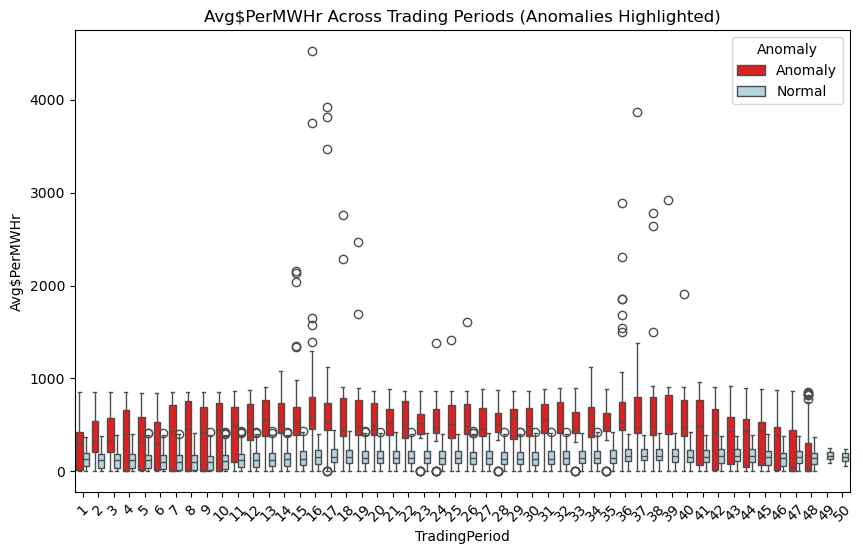

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TradingPeriod', y='Avg$PerMWHr', hue='Anomaly', palette={'Normal': 'lightblue', 'Anomaly': 'red'})
plt.title('Avg$PerMWHr Across Trading Periods (Anomalies Highlighted)')
plt.xticks(rotation=45)
plt.show()
